## Lab1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices


$$
\Sigma_1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$$

$$
\Sigma_2 = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}
$$




In [4]:
var = np.random.uniform(0, 1, 1000)

mean, sigma = 0, 1
var2 = np.random.normal(mean, sigma, 1000)

mean, sigma = 0, 10
var3 = np.random.normal(mean, sigma, 1000)

beta_dist_1 = np.random.beta(1,1, 1000)
beta_dist_2 = np.random.beta(2,2, 1000)
beta_dist_3 = np.random.beta(3,9, 1000)

mu = np.array([0, 0])

Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[2, 1], [1, 2]])

samples1 = np.random.multivariate_normal(mu, Sigma1, 10000)
samples2 = np.random.multivariate_normal(mu, Sigma2, 10000)

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

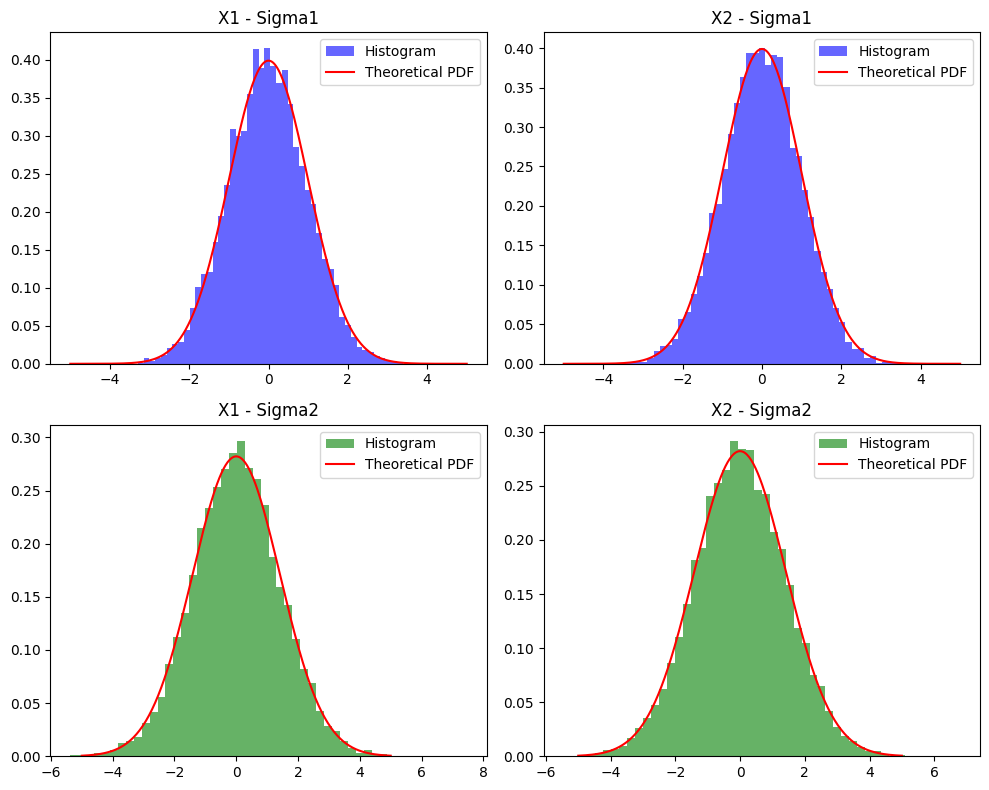

In [6]:
from scipy.stats import norm


mu = np.array([0, 0])

Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[2, 1], [1, 2]])


num_samples = 10000


samples1 = np.random.multivariate_normal(mu, Sigma1, num_samples)
samples2 = np.random.multivariate_normal(mu, Sigma2, num_samples)

# Extract marginal distributions
x1_samples1, x2_samples1 = samples1[:, 0], samples1[:, 1]
x1_samples2, x2_samples2 = samples2[:, 0], samples2[:, 1]

x_vals = np.linspace(-5, 5, 300)


pdf_x1_Sigma1 = norm.pdf(x_vals, loc=0, scale=np.sqrt(Sigma1[0, 0]))
pdf_x2_Sigma1 = norm.pdf(x_vals, loc=0, scale=np.sqrt(Sigma1[1, 1]))
pdf_x1_Sigma2 = norm.pdf(x_vals, loc=0, scale=np.sqrt(Sigma2[0, 0]))
pdf_x2_Sigma2 = norm.pdf(x_vals, loc=0, scale=np.sqrt(Sigma2[1, 1]))


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(x1_samples1, bins=50, density=True, alpha=0.6, color='b', label="Histogram")
axes[0, 0].plot(x_vals, pdf_x1_Sigma1, 'r-', label="Theoretical PDF")
axes[0, 0].set_title("X1 - Sigma1")
axes[0, 0].legend()

axes[0, 1].hist(x2_samples1, bins=50, density=True, alpha=0.6, color='b', label="Histogram")
axes[0, 1].plot(x_vals, pdf_x2_Sigma1, 'r-', label="Theoretical PDF")
axes[0, 1].set_title("X2 - Sigma1")
axes[0, 1].legend()

axes[1, 0].hist(x1_samples2, bins=50, density=True, alpha=0.6, color='g', label="Histogram")
axes[1, 0].plot(x_vals, pdf_x1_Sigma2, 'r-', label="Theoretical PDF")
axes[1, 0].set_title("X1 - Sigma2")
axes[1, 0].legend()

axes[1, 1].hist(x2_samples2, bins=50, density=True, alpha=0.6, color='g', label="Histogram")
axes[1, 1].plot(x_vals, pdf_x2_Sigma2, 'r-', label="Theoretical PDF")
axes[1, 1].set_title("X2 - Sigma2")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).

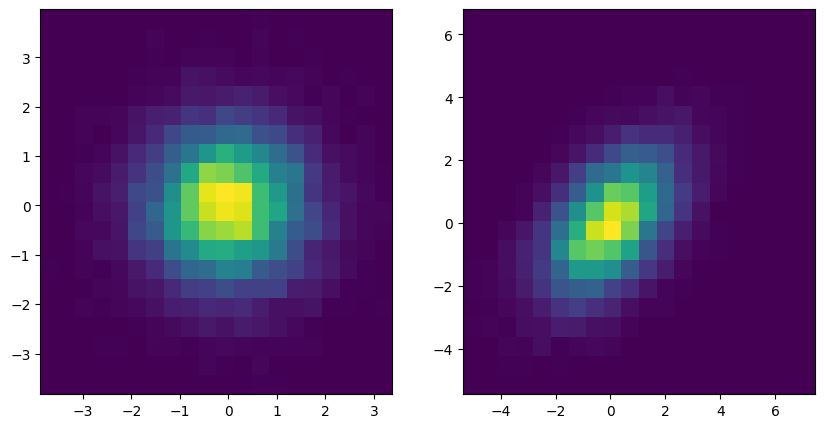

In [9]:
# visualisation with pyplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

n_bins = 20

axs[0].hist2d(samples1[:,0], samples1[:,1], bins=n_bins)
axs[1].hist2d(samples2[:,0], samples2[:,1], bins=n_bins)

plt.show()

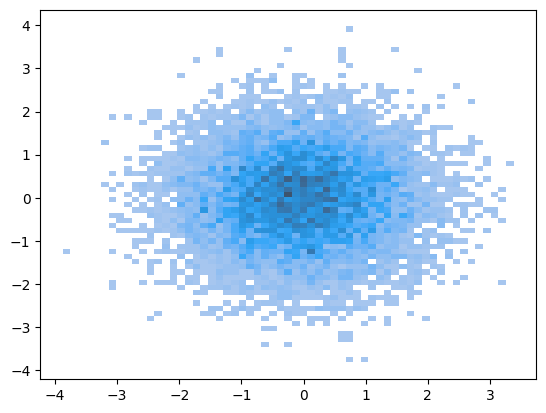

In [10]:
sns.histplot(x = samples1[:, 0], y = samples1[:, 1])
plt.show()

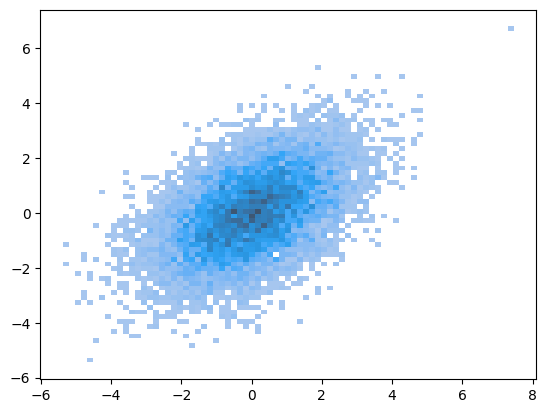

In [11]:
sns.histplot(x = samples2[:, 0], y = samples2[:, 1])
plt.show()

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
math
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 


In [12]:
samples = 1000

alpha = np.random.normal(2, 0.1, samples)
beta = np.random.normal(0.2, 0.2, samples)
x = np.random.normal(0, 3, samples)

sigma = np.abs(np.random.normal(0,1, samples))

mu = alpha + beta * x
y = np.random.normal(mu, sigma)

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot). 

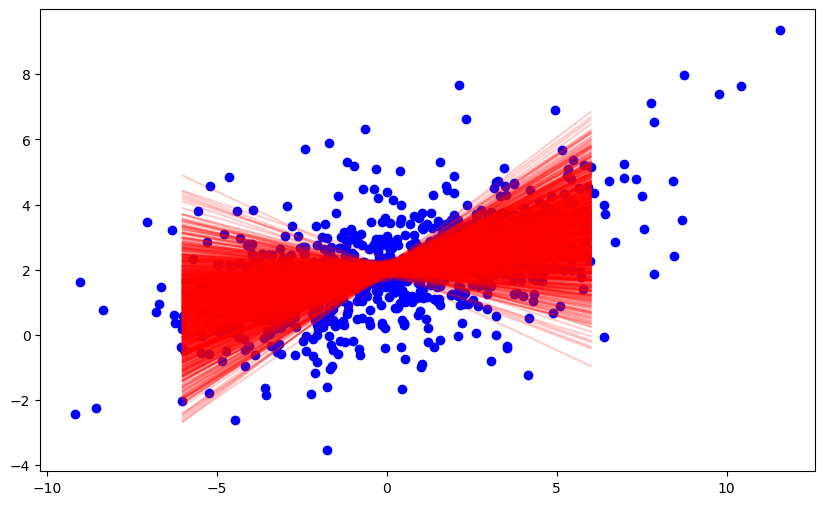

In [21]:
# Scatter plot of y vs x
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue")

x_line = np.ones((1000,2)) * np.array([-6, 6])
beta_x = np.expand_dims(beta, 0).T * x_line
y_line = np.expand_dims(alpha, 0).T + beta_x

for i in range(0, x_line.shape[0]):
    plt.plot(x_line[i,:], y_line[i,:], 'r', alpha=0.2)

plt.show()
